In [2]:
!pip install wordninja

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.6/541.6 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wordninja: filename=wordninja-2.0.0-py3-none-any.whl size=541530 sha256=268a084911bc4a8e6cd39fc75b06631b853a3bfd9b9c7ca885ee15ac8e49dd7d
  Stored in directory: /Users/domi/Library/Caches/pip/wheels/6e/31/92/f12667e4dd102e546832a02f41feca39ae916889006517e595
Successfully built wordninja


In [4]:
import wordninja

wordninja.split('CSJSCRIPTEVENTID')
result = wordninja.split('iReferenceDataSystemAttributesEN')
filtered_result = [word for word in result if len(word) > 2]
print(filtered_result)
print(' '.join(wordninja.split('dasIstEineVerrückteZeit')))

['Reference', 'Data', 'System', 'Attributes']
das Is tEi neVer r ck te Zeit


In [1]:
%%bash
export NR_OF_RECORDS_EACH=500
echo "Creating a small dataset with ${NR_OF_RECORDS_EACH} records"

Creating a small dataset with 500 records


In [ ]:
uid |   dbtype |   |           dbname |      owner |       table_name |      column_name                        |     data_type |
324,    Oracle, PDMP01,OWN_ETLDM,RFA772203,Belastungskonto des Kredits oder Konto, das den Zins verursacht hat,VARCHAR2

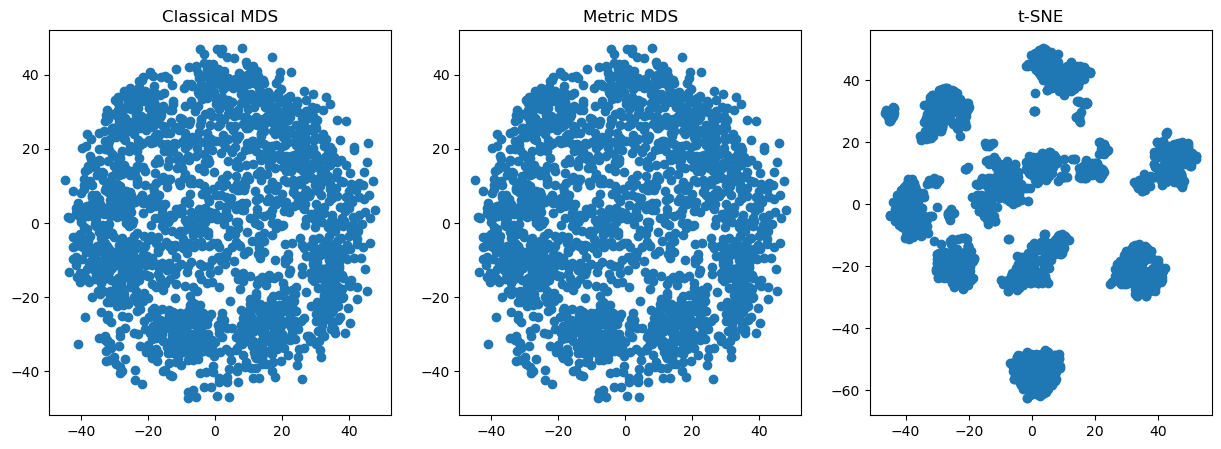

In [1]:
from sklearn.manifold import MDS, TSNE
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# Load sample data
digits = load_digits()
X = digits.data

# Classical MDS
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X)

# Metric MDS
mmds = MDS(n_components=2, metric=True, random_state=42)
X_mmds = mmds.fit_transform(X)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.scatter(X_mds[:, 0], X_mds[:, 1])
ax1.set_title('Classical MDS')

ax2.scatter(X_mmds[:, 0], X_mmds[:, 1])
ax2.set_title('Metric MDS')

ax3.scatter(X_tsne[:, 0], X_tsne[:, 1])
ax3.set_title('t-SNE')

plt.show()

In [4]:
# !pip uninstall -y lingua
!pip install lingua-language-detector


  Using cached lingua_language_detector-2.0.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (349 kB)
Using cached lingua_language_detector-2.0.2-cp312-cp312-macosx_11_0_arm64.whl (74.1 MB)


In [5]:
from lingua import Language, LanguageDetectorBuilder


In [6]:
from lingua import Language, LanguageDetectorBuilder

def setup_simple_detector():
    # Build a detector specifically for English and German
    detector = LanguageDetectorBuilder.from_languages(
        Language.ENGLISH, 
        Language.GERMAN
    ).build()
    return detector

def process_mixed_words_simple(words, detector, model, tokenizer):
    processed_words = []
    
    for word in words:
        # Detect if word is German
        detected_lang = detector.detect_language_of(word)
        
        if detected_lang == Language.GERMAN:
            # Translate German words
            inputs = tokenizer([word], return_tensors="pt", padding=True)
            outputs = model.generate(**inputs)
            translated = tokenizer.decode(outputs[0], skip_special_tokens=True)
            processed_words.append(translated)
        else:
            # Keep non-German words as is
            processed_words.append(word)
    
    return processed_words

In [12]:
detector = setup_simple_detector()
detected_lang = detector.detect_language_of("CMZKE_KUNDE")
print(detected_lang)

Language.GERMAN


In [38]:
!pip uninstall -y compound_splitter
!pip install git+https://github.com/repodiac/german_compound_splitter

!unzip data/german.zip german.dic -d data

!pip install germalemma

  Cloning https://github.com/repodiac/german_compound_splitter to /private/var/folders/bm/0wrf7t4x7b98ls2kyp8nv5800000gn/T/pip-req-build-3df3nwg_
  Running command git clone --filter=blob:none --quiet https://github.com/repodiac/german_compound_splitter /private/var/folders/bm/0wrf7t4x7b98ls2kyp8nv5800000gn/T/pip-req-build-3df3nwg_
  Resolved https://github.com/repodiac/german_compound_splitter to commit cec07e3c70f9ce46f8bb18c078684c2b93c2ab08
  Preparing metadata (setup.py) ... done
Archive:  data/german.zip
  inflating: data/german.dic         
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 8.9 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.1/22.1 MB 7.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 69.0 MB/s eta 0:00:00


In [42]:
from germalemma import GermaLemma

lemmatizer = GermaLemma()

# passing the word and the POS tag ("N" for noun)
lemma = lemmatizer.find_lemma('CMZKE_KUNDE', 'N')
print(lemma)

CMZKE_KUNDE


In [48]:
from german_compound_splitter import comp_split

compound = 'Donaudampfschifffahrtskapitänsmützenabzeichen'
# please load an appropriate (external) dictionary, see the notes in section Installation/Setup on the dictionary
input_file = 'german.dic'
ahocs = comp_split.read_dictionary_from_file('data/german.dic')

dissection = comp_split.dissect(compound, ahocs, make_singular=True)
print('SPLIT WORDS (plain):', dissection)
print('SPLIT WORDS (post-merge):', comp_split.merge_fractions(dissection))


Loading data file - data/german.dic


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 0: invalid start byte

In [20]:
from compound_splitter import CompoundSplitter

'data/german.dic.gz'

splitter = CompoundSplitter()
# result = splitter.split_compound("Kombinationsmöglichkeit")
# print(result)  # Example: ['Kombination', 'Möglichkeit']


def split_german_compound(word):
    return splitter.split_compound(word)

# Example
word = "Hauptbahnhof"
result = split_german_compound(word)  # ['haupt', 'bahnhof']
print(result)

# Example
word = "Gesundheitswesen"
result = split_german_compound(word)  # ['Gesundheit', 'wesen']
print(result)

SyntaxError: invalid syntax (406591313.py, line 1)

In [11]:
!pip install spacy
!python -m spacy download de_core_news_md
!pip install germalemma
!pip install HanTa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 MB 74.2 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_md')
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.0/15.0 MB 74.0 MB/s eta 0:00:00a 0:00:01


In [8]:
from germalemma import GermaLemma

lemmatizer = GermaLemma()

x = 'Feinstaub_belastungen'

words = x.split('_')

all = ' '.join([lemmatizer.find_lemma(word, 'NVADJ') for word in words if len(word) > 3 and not word.isdigit()])

# passing the word and the POS tag ("N" for noun)
# lemma = lemmatizer.find_lemma(y, 'N')
print(all)
# -> lemma is "Feinstaubbelastung"

Feinstaub Belastungen


In [37]:
import spacy
nlp = spacy.load('de_core_news_md')

mails=['Hallo. Ich spielte am frühen Morgen und ging dann zu einem Freund. Auf Wiedersehen', 'Guten Tag Ich möchte Bälle und will etwas kaufen. Tschüss']

mails_lemma = []

for mail in mails:
     doc = nlp(mail)
     result = ' '.join([x.lemma_ for x in doc]) 
     mails_lemma.append(result)

print(mails_lemma)

['Hallo -- ich spielen an früh Morgen und gehen dann zu ein Freund -- auf Wiedersehe', 'gut Tag ich möchten Ball und wollen etwas kaufen -- Tschüss']


In [36]:
from HanTa import HanoverTagger as ht

tagger = ht.HanoverTagger('morphmodel_ger.pgz')

mails=['Hallo. Ich spielte am frühen Morgen und ging dann zu einem Freund. Auf Wiedersehen',
       'Guten Tag Ich mochte Bälle und will etwas kaufen. Tschüss']

mails_lemma = []
for mail in mails:
    lemma = [lemma for (word,lemma,pos) in tagger.tag_sent(mail.split())]
    mails_lemma.append(' '.join(lemma))

print(mails_lemma)    


x = 'Feinstaub_belastung'

y  = tagger.tag_sent(x.split('_'))
print(y)
print(y[0][1])

['hallo. ich spielen an früh Morgen und gehen dann zu ein Freund. auf Wiedersehen', 'gut Tag ich mögen Ball und wollen etwas Kaufen. Tschüss']
[('Feinstaub', 'Feinstaub', 'NE'), ('belastung', 'Belastung', 'NN')]
Feinstaub
